In [1]:
import numpy as np
import pandas as pd
import os
from os import path
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import RadiusNeighborsRegressor, KNeighborsRegressor
from sklearn.decomposition import PCA
data_loc = '/project/wyin/jlee/ml-project/inverse-problem/data'
print(os.getcwd())

/project/wyin/jlee/ml-project/inverse-problem/nearest-neighbors


In [2]:
train_set = np.load(os.path.join(data_loc, 'train-set.npz'))
train_params = train_set['params']
train_dos = train_set['dos']

val_set = np.load(os.path.join(data_loc, 'val-set.npz'))
val_params = val_set['params']
val_dos = val_set['dos']

test_set = np.load(os.path.join(data_loc, 'test-set.npz'))
test_params = test_set['params']
test_dos = test_set['dos']

#With standard scaling
scaler = StandardScaler()
train_dos_scaled = scaler.fit_transform(train_dos)
val_dos_scaled = scaler.transform(val_dos)

num_train_points = len(train_params)
print(num_train_points)

106120


(106120, 301)


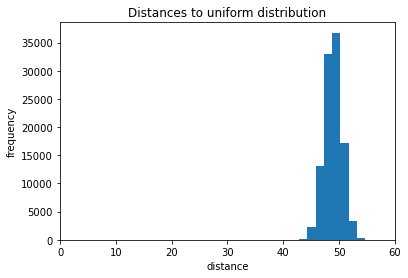

In [104]:
#Simulate distances of a random uniform scatter in high dimensional space
num_dims = 301
points = np.random.uniform(low = - 12 ** 0.5, high = 12 ** 0.5, size = (num_train_points, num_dims))

plt.xlim(0, 60)
distances = []
for point in points[1:]:
    distance = (np.sum((point - points[0])**2))**0.5
    distances.append(distance)

distances = np.array(distances)
plt.hist(distances)
plt.xlabel("distance")
plt.ylabel("frequency")
plt.title("Distances to uniform distribution")
print(points.shape)

(array([8.7000e+01, 1.0260e+03, 6.2990e+03, 2.0248e+04, 3.3334e+04,
        2.8569e+04, 1.3039e+04, 3.0960e+03, 3.8900e+02, 3.2000e+01]),
 array([20.28491797, 20.99366082, 21.70240368, 22.41114653, 23.11988938,
        23.82863223, 24.53737509, 25.24611794, 25.95486079, 26.66360365,
        27.3723465 ]),
 <BarContainer object of 10 artists>)

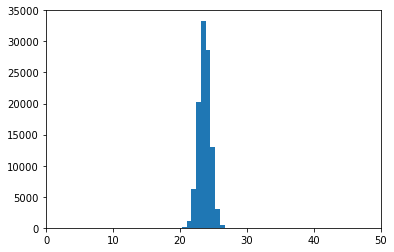

In [46]:
#Simulate distances of a random gaussian scatter in high dimensional space
#Simulate distances of a random uniform scatter in high dimensional space
num_dims = 301
points = np.random.normal(size = (num_train_points, num_dims))

plt.xlim([0, 50])
distances = []
for point in points[1:]:
    distance = (np.sum((point - points[0])**2))**0.5
    distances.append(distance)

distances = np.array(distances)
plt.hist(distances)

(301,)


Text(0.5, 1.0, 'Distance to training set points in dos space')

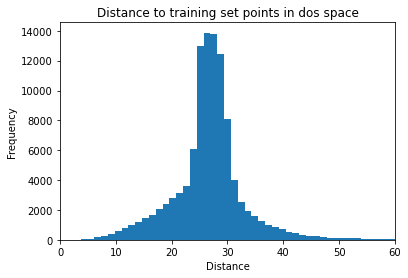

In [108]:
#print(train_dos_scaled[0])
distances = []
plt.xlim([0, 60])
for dos in train_dos_scaled:
    distance = (np.sum((dos - val_dos_scaled[0]) ** 2)) ** 0.5
    distances.append(distance)

print(dos.shape)
distances = np.array(distances)
plt.hist(distances, bins = np.linspace(0, 60))
plt.ylabel("Frequency")
plt.xlabel("Distance")
plt.title("Distance to training set points in dos space")

In [109]:
model = KNeighborsRegressor(n_neighbors = 50)
model.fit(train_dos_scaled, train_params)
print(model.kneighbors(train_dos_scaled[:1])[0])

[[0.         2.20180738 2.33551046 2.62014218 2.65149193 2.97456938
  3.56353872 3.74636622 3.79028188 3.79719372 3.86844776 3.9032483
  3.91320318 4.07062559 4.16440554 4.24779869 4.26918114 4.34815888
  4.41646102 4.43185754 4.50410075 4.6587835  4.66408511 4.8281152
  4.96727872 4.97268127 5.07193219 5.07753427 5.10821306 5.19169359
  5.20805342 5.27377956 5.32012528 5.43751591 5.50980416 5.57689799
  5.59374534 5.61221101 5.6627886  5.68188657 5.70084933 5.7153135
  5.79982176 5.80422318 5.81634167 5.91505458 5.94479665 5.97114622
  5.9784854  6.02883074]]


Text(0.5, 1.0, 'Distances between random pairs of points in 301 dim space')

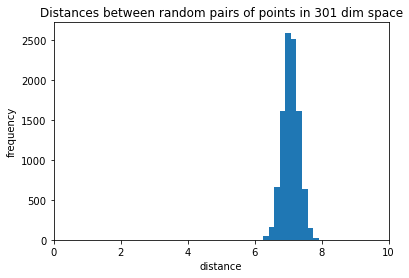

In [3]:
#Sample from random point pairs in uniform sample
num_dims = 301

plt.xlim(0, 10)
distances = []
for i in range(10000):
    
    point1 = np.random.uniform(size = (301,))
    point2 = np.random.uniform(size = (301,))

    distance = (np.sum((point1 - point2)**2))**0.5
    distances.append(distance)

distances = np.array(distances)
plt.hist(distances)
plt.xlabel("distance")
plt.ylabel("frequency")
plt.title(f"Distances between random pairs of points in {num_dims} dim space")

(301,)
(106120, 301)


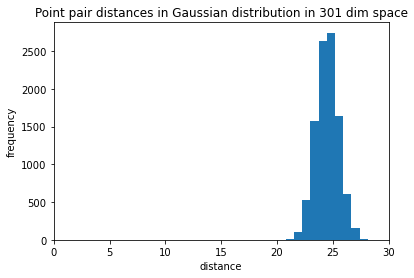

In [132]:
#Sample from random point pairs in uniform sample
num_dims = 301
points = np.random.normal(size = (num_train_points, num_dims))

plt.xlim(0, 30)
distances = []
inds = []
for i in range(10000):
    
    ind1 = np.random.randint(0, num_train_points)
    ind2 = np.random.randint(0, num_train_points)
    if ind1 != ind2:
        distance = (np.sum((points[ind1] - points[ind2])**2))**0.5
        distances.append(distance)

print(points[ind1].shape)
distances = np.array(distances)
plt.hist(distances)
plt.xlabel("distance")
plt.ylabel("frequency")
plt.title(f"Point pair distances in Gaussian distribution in {num_dims} dim space")
print(points.shape)

Text(0.5, 1.0, 'Distances between random pairs of spectra in dos space')

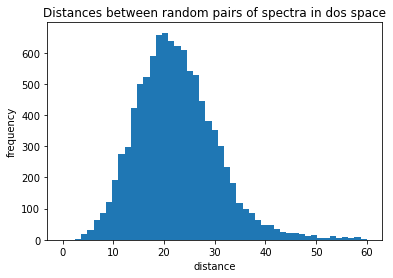

In [4]:
#Sample from random point pairs in training set

#plt.xlim(0, 60)
distances = []
inds = []
for i in range(10000):
    
    ind1 = np.random.randint(0, num_train_points)
    ind2 = np.random.randint(0, num_train_points)
    if ind1 != ind2:
        distance = (np.sum((train_dos_scaled[ind1] - train_dos_scaled[ind2])**2))**0.5
        distances.append(distance)

distances = np.array(distances)
plt.hist(distances, bins = np.linspace(0, 60))
plt.xlabel("distance")
plt.ylabel("frequency")
plt.title(f"Distances between random pairs of spectra in dos space")